In [5]:
import numpy as np
import matplotlib.pyplot as plt
import datetime, sys, re, os
import pandas as pd

In [6]:
import csky as cy
import astropy
import healpy as hp
import histlite as hl
cy.plotting.mrichman_mpl()
soft_colors = cy.plotting.soft_colors

/mnt/ceph1-npx/user/ssclafani/software/external/csky/csky/plotting.py:92: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  r'\SetSymbolFont{operators}   {sans}{OT1}{cmss} {m}{n}'


In [7]:
import matplotlib as mpl
import seaborn as sns

In [8]:
colors = ['#0B3D53', '#FF7F0E',  '#5C9FC9']

In [9]:
repo = cy.selections.Repository(local_root='/data/user/ssclafani/data/analyses') #Matches the repo in /data/ana/ but has some additional sensitvities written and loadable
ana_dir = cy.utils.ensure_dir('/data/user/ssclafani/data/analyses')
embargo_label = True
if embargo_label:
    plot_dir = cy.utils.ensure_dir('/home/ssclafani/plots/paperplots_embargo/Fig_UL')
else:
    plot_dir = cy.utils.ensure_dir('/home/ssclafani/plots/paperplots/Fig_UL')

In [10]:
specs = cy.selections.DNNCascadeDataSpecs.DNNC_10yr
ana = cy.get_analysis (repo, 'version-001-p01', specs)


Setting up Analysis for:
DNNCascade_10yr
Setting up DNNCascade_10yr...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p01/MC_NuGen_bfrv1_2153x.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p01/IC86_2011_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p01/IC86_2012_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p01/IC86_2013_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p01/IC86_2014_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p01/IC86_2015_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p01/IC86_2016_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p01/IC86_2017_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p01/IC86_2018_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p01/IC86

In [11]:
decs = np.arange(-81, 81.1, 2)

In [12]:
estes_E_minus2 = np.load('/data/user/smancina/PSSearches/ESTES_2019/CSky/ESTES2021_Sens_E-2.npy')
estes_sd = estes_E_minus2[0]
estes_flux = estes_E_minus2[1]
conf= {
'src' : cy.sources(dec=0, ra=0, deg=True),
'flux' : cy.hyp.PowerLawFlux(gamma=2, energy_cutoff=np.inf)
        }
tr = cy.get_trial_runner(ana=ana, conf=conf)
nss = [tr.to_ns(f, E0=1, unit=1e3) for f in estes_flux]
estes_E2dNdE = [tr.to_E2dNdE(n, E0 = 100, unit=1e3) for n in nss]

In [13]:
'''tracks_E2 = np.load('saved_sens/tracks_10yr_E2.npy')
sd_t = tracks_E2[::2]
tracks_flux_E2 = tracks_E2[1::2]
'''
pstracks_10yr = np.loadtxt('saved_sens/pstracks10yr_E2.txt')
pstracks_flux = pstracks_10yr[:,1]
pstracks_sd = pstracks_10yr[:,0]

In [14]:
sd_a = np.load('saved_sens/antares_13yr_E2_sd.npy')
phi_a = np.load('saved_sens//antares_13yr_E2_flux.npy')

In [15]:
base_dir = '/data/ana/analyses/NuSources/2021_DNNCascade_analyses/baseline_analysis/'
E2_decs = np.load(base_dir + 'ps/trials/DNNC/ps_sens_decs_E200_nofit.npy')
E2_fluxs = np.load(base_dir + 'ps/trials/DNNC/ps_sens_flux_E200_nofit.npy')

E3_decs = np.load(base_dir + 'ps/trials/DNNC/ps_sens_decs_E300.npy')
E3_fluxs = np.load(base_dir + 'ps/trials/DNNC/ps_sens_flux_E300.npy')

In [16]:
base_dir = '/data/user/ssclafani/data/analyses/baseline_unblind_v1.0.0/'

In [17]:
#E2_decs_dp3_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_3.0sigma_decs_E200_nofit.npy')
#E2_fluxs_dp3_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_3.0sigma_flux_E200_nofit.npy')
#E2_tss_dp3_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_3.0sigma_tss_E200_nofit.npy')

E2_decs_dp5_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_5.0sigma_decs_E200_nofit.npy')
E2_fluxs_dp5_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_5.0sigma_flux_E200_nofit.npy')

E2_decs_dp4_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_4.0sigma_decs_E200_nofit.npy')
E2_fluxs_dp4_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_4.0sigma_flux_E200_nofit.npy')
E3_decs_dp4_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_4.0sigma_decs_E300_nofit.npy')
E3_fluxs_dp4_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_4.0sigma_flux_E300_nofit.npy')

#E3_decs_dp3_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_3.0sigma_decs_E300_nofit.npy')
#E3_fluxs_dp3_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_3.0sigma_flux_E300_nofit.npy')
#E3_tss_dp3_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_3.0sigma_tss_E300_nofit.npy')

#E3_decs_dp5_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_5.0sigma_decs_E300_nofit.npy')
#E3_fluxs_dp5_nofit = np.load(base_dir + 'ps/trials/DNNC/ps_dp_5.0sigma_flux_E300_nofit.npy')


In [18]:
preliminary = False

In [19]:
mesc7 = np.loadtxt('saved_sens/MESC7_E2.txt')
phi_m_2 = mesc7[:,1]
sd_m_2 = mesc7[:,0]

In [20]:
pstracks = np.loadtxt('saved_sens/pstracks10yr_E2.txt')
pstracks_sd = pstracks[:,0]
pstracks_flux = pstracks[:,1]

-> /home/ssclafani/plots/paperplots_embargo/Fig_UL/ps_sens_E200


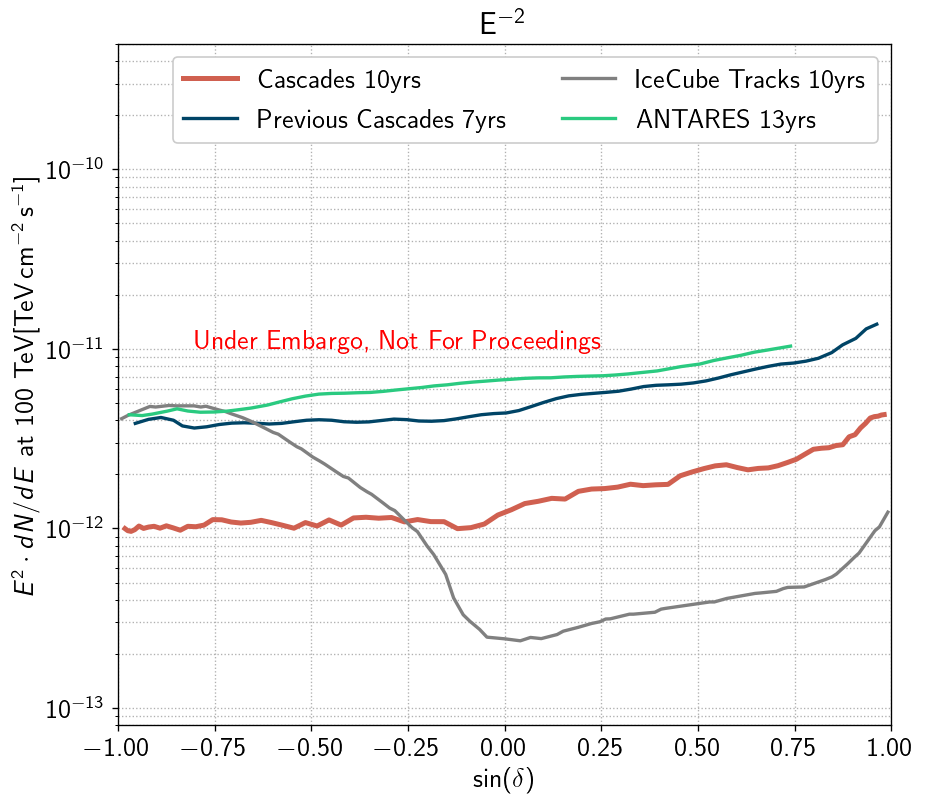

In [21]:
mpl.rc('font', size=16) 
fig, ax1 = plt.subplots (1, figsize=(8,7)) 
#sd_m, phi_m = repo.get_performance('sens_E200_MESE')[:2]

ax1.semilogy(sorted(np.sin(np.radians(E2_decs[1:]))), E2_fluxs[1:], 
             ls = '-', c=soft_colors[1], lw=3, label='Cascades 10yrs')
#ax1.semilogy(sorted(np.sin(np.radians(E2_decs_dp3_nofit[1:]))), E2_fluxs_dp3_nofit[1:], 
#             ls = '--', c=soft_colors[1], lw=3, label='Cascades 3$\sigma$ DP')
#ax1.semilogy(sorted(np.sin(np.radians(E2_decs_dp5_nofit[1:]))), E2_fluxs_dp5_nofit[1:], 
#             ls = ':', c=soft_colors[1], lw=3, label='Cascades 5$\sigma$ DP')

ax1.semilogy (sd_m_2, phi_m_2, lw=2, c=soft_colors[0],  label=r'Previous Cascades 7yrs')

#sd, phi = repo.get_performance ('sens_E200_ps10_current')[:2]
ax1.semilogy (pstracks_sd, pstracks_flux, label=r'IceCube Tracks 10yrs', color='grey', ls='-')

ax1.semilogy (sd_a, phi_a /1e3, label=r'ANTARES 13yrs', color=soft_colors[2],lw=2,  ls='-')
#ax1.semilogy(estes_sd, estes_E2dNdE, label='ESTES-9yr', color=soft_colors[4], lw=2)

ax1.set_xlabel (r'$\sin(\delta)$')
ax1.set_ylabel (
    r'$E^2\cdot dN/dE$'
    r' at 100 TeV'
    r'[$\textsf{TeV}\,\textsf{cm}^{-2}\,\textsf{s}^{-1}]$')


if embargo_label:
    ax1.text(-.8, 1e-11, r'Under Embargo, Not For Proceedings', weight='bold', c='r', size=16)
    
ax1.set_xlim (-1, 1)
ax1.grid(which='both')
ax1.set_ylim (.8e-13, 5e-10)
ax1.legend (ncol=2)
ax1.set_title('E$^{-2}$')
if preliminary == True:
    ax1.text(-.9, 1e-13, r'\textbf{IceCube Preliminary}', c='r')
plt.tight_layout()
cy.plotting.saving(plot_dir, 'ps_sens_E200')

In [22]:
mesc7 = np.loadtxt('saved_sens/MESC7_E3.txt')
phi_m_3 = mesc7[:,1]
sd_m_3 = mesc7[:,0]

In [23]:
estes_E_minus3 = np.load('/data/user/smancina/PSSearches/ESTES_2019/CSky/ESTES2021_Sens_E-3.npy')
estes_sd = estes_E_minus3[0]
estes_flux = estes_E_minus3[1]


conf= {
'src' : cy.utils.Sources(dec=0, ra=0, deg=False),
'flux' : cy.hyp.PowerLawFlux(gamma=3, energy_cutoff=np.inf)
        }
tr = (cy.get_trial_runner(ana=ana, conf=conf))
    
nss = [tr.to_ns(f, E0=1, unit=1e3) for f in estes_flux]
estes_E2dNdE = [tr.to_E2dNdE(n, E0 = 100, unit=1e3) for n in nss]

In [24]:
estes_E_minus3 = np.load('/data/user/smancina/PSSearches/ESTES_2019/CSky/ESTES2021_Sens_E-3.npy')
estes_sd = estes_E_minus3[0]
estes_flux = estes_E_minus3[1]
trs = []
for dec in np.arcsin(estes_sd):
    conf= {
    'src' : cy.utils.Sources(dec=dec, ra=0, deg=False),
    'flux' : cy.hyp.PowerLawFlux(gamma=3, energy_cutoff=np.inf)
            }
    trs.append(cy.get_trial_runner(ana=ana, conf=conf))
    
nss = [tr.to_ns(f, E0=1, unit=1e3) for f, tr in zip(estes_flux, trs)]
estes_E2dNdE = [tr.to_E2dNdE(n, E0 = 100, unit=1e3) for n , tr in zip(nss, trs)]

In [25]:
estes_E_minus3 = np.load('/data/user/smancina/PSSearches/ESTES_2019/CSky/ESTES2021_Sens_E-3.npy')
estes_sd = estes_E_minus3[0]
estes_flux = estes_E_minus3[1]


conf= {
    'src' : cy.utils.Sources(dec=0, ra=0, deg=True),
    'flux' : cy.hyp.PowerLawFlux(gamma=3, energy_cutoff=np.inf)
            }
tr = cy.get_trial_runner(ana=ana, conf=conf)
    
nss = [tr.to_ns(f, E0=1, unit=1e3) for f  in estes_flux]
estes_E2dNdE = [tr.to_E2dNdE(n, E0 = 100, unit=1e3) for n  in nss]

In [26]:
E2dNdE_tracks_E3 = np.load('saved_sens/pstracks10yr_E3_100TeV_conversion.npy')
sd_tracks_E3 = np.loadtxt('saved_sens/pstracks_10yr_E3.txt')[:,0]

-> /home/ssclafani/plots/paperplots_embargo/Fig_UL/ps_sens_E300


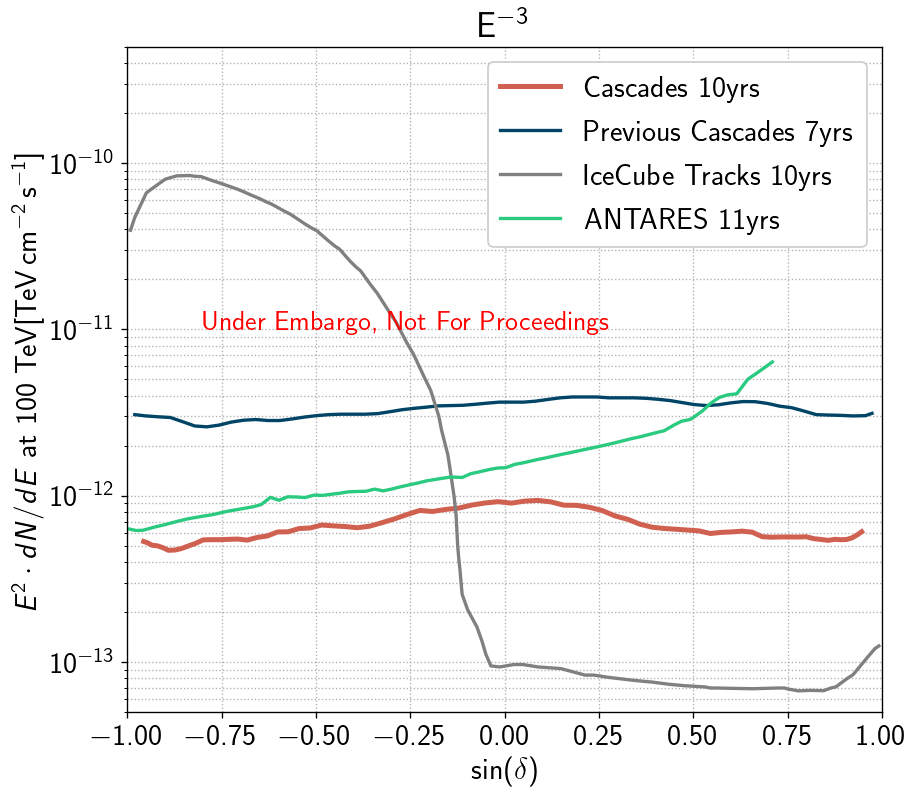

In [27]:
mpl.rc('font', size=18) 
fig, ax1 = plt.subplots (1, figsize=(8,7)) 

ax1.semilogy(sorted(np.sin(np.radians(E3_decs[8:-8]))), E3_fluxs[8:-8], 
             ls = '-', c=soft_colors[1], lw=3, label='Cascades 10yrs')
#ax1.semilogy(sorted(np.sin(np.radians(E3_decs_dp3_nofit[1:]))), E3_fluxs_dp3_nofit[1:], 
#             ls = '--', c=soft_colors[1], lw=3, label='Cascades 3$\sigma$ DP')
#ax1.semilogy(sorted(np.sin(np.radians(E3_decs_dp5_nofit[1:]))), E3_fluxs_dp5_nofit[1:], 
#             ls = ':', c=soft_colors[1], lw=3, label='Cascades 5$\sigma$ DP')

#sd_m, phi_m = repo.get_performance('sens_E300_MESE')[:2]
ax1.semilogy (sd_m_3, phi_m_3, lw=2, c=soft_colors[0],  label=r'Previous Cascades 7yrs')

#ax1.semilogy(sorted(np.sin(np.radians(E3_sysdecs[4:-4]))), E3_sysfluxs[4:-4], 
#            ls = ':', c=soft_colors[1], lw=3, label='Systematics FullRange')
#tracks = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/10yr_sens_E300.pickle')

ax1.semilogy (sd_tracks_E3, E2dNdE_tracks_E3, label=r'IceCube Tracks 10yrs', color='grey', ls='-')

antares_sens = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/antares_sens_E300.pickle')
sd = antares_sens['sindec']
e2dnde = antares_sens['E2dNdE']
ax1.semilogy(sd, e2dnde,  label=r'ANTARES 11yrs', color=soft_colors[2],lw=2,  ls='-')

#ax1.semilogy(estes_sd, estes_E2dNdE, label='ESTES 9yr', color=soft_colors[4], lw=2)
if preliminary == True:
    ax1.text(-.9, .7e-13, r'\textbf{IceCube Preliminary}', c='r')
    


if embargo_label:
    ax1.text(-.8, 1e-11, r'Under Embargo, Not For Proceedings', weight='bold', c='r', size=16)
ax1.set_xlabel (r'$\sin(\delta)$')
ax1.set_ylabel (
    r'$E^2\cdot dN/dE$'
    r' at 100 TeV'
    r'[$\textsf{TeV}\,\textsf{cm}^{-2}\,\textsf{s}^{-1}]$')
ax1.set_xlim (-1, 1)
ax1.grid(which='both')
ax1.set_ylim (.5e-13, 5e-10)
ax1.legend (ncol=1)
ax1.set_title('E$^{-3}$')
plt.tight_layout()

cy.plotting.saving(plot_dir, 'ps_sens_E300')

In [28]:
import sys
sys.path.insert(0, '../..')

import config as cg


Running as User: ssclafani on Hostname: cobalt08.icecube.wisc.edu


In [29]:
UL2 = np.load('/home/ssclafani/DNNCascade/notebooks/unblinding/sourcelist_UL90_E2_patch_01.npy', allow_pickle=True)
UL3 = np.load('/home/ssclafani/DNNCascade/notebooks/unblinding/sourcelist_UL90_E3_patch_01.npy', allow_pickle=True)

In [30]:
e2_sens = np.interp(np.linspace(-1,1,1000),E2_decs, E2_fluxs)

In [31]:
src_list_file = os.path.join(cg.catalog_dir, 'Source_List_DNNC.npy')
sourcelist = np.load(src_list_file, allow_pickle=True)

def get_plotting_flux(gamma):
    sindec = []
    fs = []
    if gamma == 2:
        UL = UL2
        decs = E2_decs
        fluxs = E2_fluxs
    elif gamma == 3:
        UL = UL3
        decs = E3_decs
        fluxs = E3_fluxs
        
    for i, source in enumerate(sourcelist):
            sindec.append(np.sin(np.radians(source[2])))
            dec = source[2]
            rounddec = np.round(dec, 0)
            if rounddec in decs:
                f = fluxs[np.argwhere(rounddec == decs)][0]
                #print(rounddec, f)
            else:
                
                high = fluxs[np.argwhere(rounddec + 1 == decs)][0]
                low = fluxs[np.argwhere(rounddec - 1 == decs)][0]
                f = (high + low) / 2
                #print(rounddec, low, high, f)
            fs.append(f)
    fs = np.concatenate(fs)

    plot_flux = []
    for i, UL in enumerate (UL):
        plot_flux.append(max(UL, fs[i]))
    return plot_flux, sindec


In [32]:

plot_flux_2, sindec = get_plotting_flux(2)
plot_flux_3, sindec = get_plotting_flux(3)

In [33]:
E2_decs[1:]

array([-79., -77., -75., -73., -71., -69., -67., -65., -63., -61., -59.,
       -57., -55., -53., -51., -49., -47., -45., -43., -41., -39., -37.,
       -35., -33., -31., -29., -27., -25., -23., -21., -19., -17., -15.,
       -13., -11.,  -9.,  -7.,  -5.,  -3.,  -1.,   1.,   3.,   5.,   7.,
         9.,  11.,  13.,  15.,  17.,  19.,  21.,  23.,  25.,  27.,  29.,
        31.,  33.,  35.,  37.,  39.,  41.,  43.,  45.,  47.,  49.,  51.,
        53.,  55.,  57.,  59.,  61.,  63.,  65.,  67.,  69.,  71.,  73.,
        75.,  77.,  79.])

-> /home/ssclafani/plots/paperplots_embargo/Fig_UL/ps_sens_E200_E300_combined


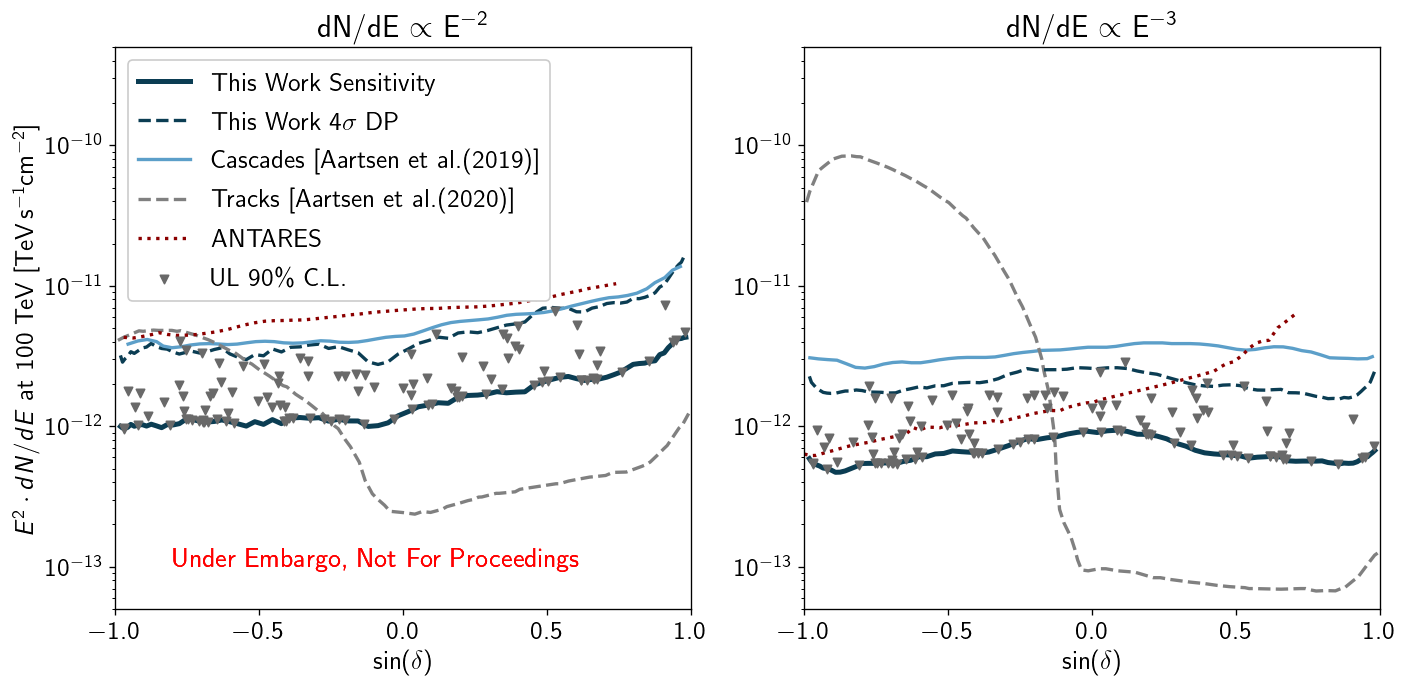

In [35]:
mpl.rc('font', size=15.5) 
fig, (ax1, ax2) = plt.subplots (1, 2, figsize=(12,6)) 
#sd_m, phi_m = repo.get_performance('sens_E200_MESE')[:2]
ax1.semilogy(sorted(np.sin(np.radians(E2_decs[1:]))), E2_fluxs[1:], 
             ls = '-', c=colors[0], lw=3, label='This Work Sensitivity')
ax1.semilogy(sorted(np.sin(np.radians(E2_decs_dp4_nofit[1:]))), E2_fluxs_dp4_nofit[1:], 
             ls = '--', c=colors[0], lw=2, label='This Work 4$\sigma$ DP')
ax1.semilogy (sd_m_2, phi_m_2, lw=2, c=colors[2],  label=r'Cascades [\textsf{Aartsen et al.(2019)}]', rasterized=True)

ax1.scatter(sindec, plot_flux_2, marker='v', color='dimgrey', s=25, label='UL 90\% C.L.', zorder=10,  rasterized=True)

ax1.semilogy (pstracks_sd, pstracks_flux, label=r'Tracks [\textsf{Aartsen et al.(2020)}]', color='grey', ls='--',  rasterized=True)
ax1.semilogy (sd_a, phi_a /1e3, label=r'ANTARES', color='darkred', lw=2,  ls=':' , rasterized=True)

#ax1.semilogy(estes_sd, estes_E2dNdE, label='ESTES-9yr', color=soft_colors[4], lw=2)

ax1.set_xlabel (r'$\sin(\delta)$')
ax1.set_ylabel (
    r'$E^2 \cdot dN/dE$'
    r' at 100 TeV'
    r' [$\text{TeV}\,\text{s}^{-1} \text{cm}^{-2}]$')
ax1.set_xlim (-1, 1)
#ax1.grid(which='major')
ax1.set_ylim (.5e-13, 5e-10)
ax1.legend (ncol=1)
ax1.set_title('dN/dE $\propto$ E$^{-2}$')



ax2.semilogy(sorted(np.sin(np.radians(E3_decs[5:-4]))), E3_fluxs[5:-4], 
             ls = '-', c=colors[0], lw=3, label='This Work')

ax2.scatter(sindec, plot_flux_3, marker='v', color='dimgrey', 
             label='UL 90\% C.L.', s=25, zorder=10)
ax2.semilogy (sd_m_3, phi_m_3, lw=2, c=colors[2],  label=r'Previous Cascades 7yrs')
ax2.semilogy (sd_tracks_E3, E2dNdE_tracks_E3, label=r'IceCube Tracks', color='grey', ls='--')
ax2.semilogy(sorted(np.sin(np.radians(E3_decs_dp4_nofit[1:]))), E3_fluxs_dp4_nofit[1:], 
             ls = '--', c=colors[0], lw=2, label='This Work 4$\sigma$ DP')
antares_sens = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/antares_sens_E300.pickle')
sd = antares_sens['sindec']
e2dnde = antares_sens['E2dNdE']
ax2.semilogy(sd, e2dnde,  label=r'ANTARES', color='darkred',lw=2,  ls=':')

#ax1.semilogy(estes_sd, estes_E2dNdE, label='ESTES 9yr', color=soft_colors[4], lw=2)
if preliminary == True:
    ax1.text(-.9, .7e-13, r'\textbf{IceCube Preliminary}', c='r')
ax2.set_xlabel (r'$\sin(\delta)$')
#ax2.set_ylabel (
#    r'$E^2\cdot dN/dE$'
#    r' at 100 TeV'
#    r'[$\textsf{TeV}\,\textsf{cm}^{-2}\,\textsf{s}^{-1}]$')
ax2.set_xlim (-1, 1)
#ax2.grid(which='major')
ax2.set_ylim (.5e-13, 5e-10)


if embargo_label:
    ax1.text(-.8, 1e-13, r'Under Embargo, Not For Proceedings', weight='bold', c='r', size=16)
    ax1.text(-.8, 1e-13, r'Under Embargo, Not For Proceedings', weight='bold', c='r', size=16)
#ax2.legend (ncol=1)
ax2.set_title('dN/dE $\propto$ E$^{-3}$')

plt.tight_layout()

cy.plotting.saving(plot_dir, 'ps_sens_E200_E300_combined', dpi=400)